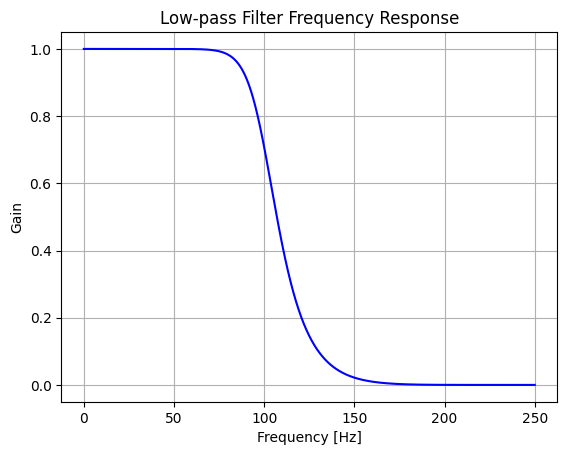

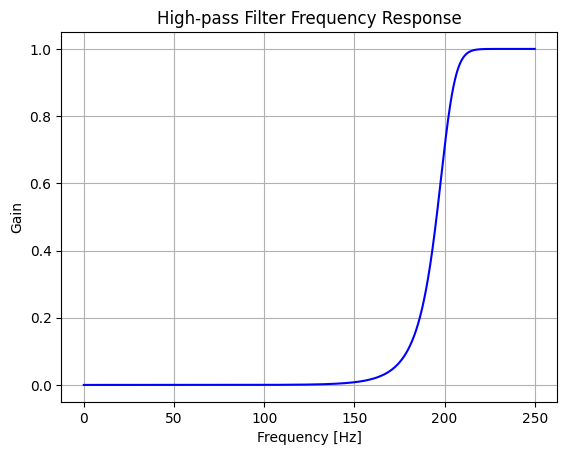

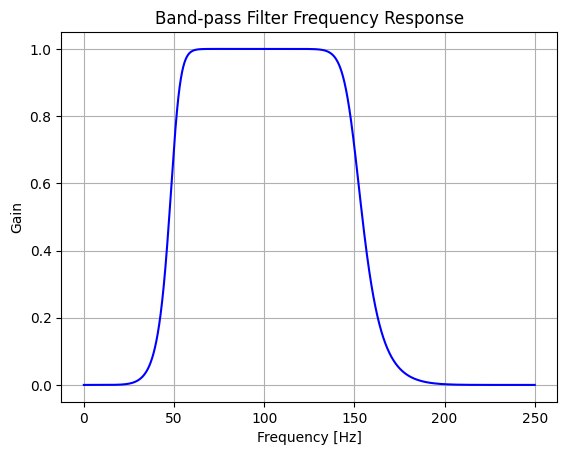

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz, butter, lfilter

# 设计低通滤波器
def low_pass_filter(cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

# 设计高通滤波器
def high_pass_filter(cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

# 设计带通滤波器
def band_pass_filter(lowcut, highcut, fs, order=5):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

# 绘制频谱响应
def plot_frequency_response(b, a, fs, title):
    w, h = freqz(b, a, worN=8000)
    plt.figure()
    plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
    plt.title(title)
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Gain')
    plt.grid()
    plt.show()

# 参数定义
fs = 500.0       # 采样频率
lowcut = 50.0    # 带通滤波器低截止频率
highcut = 150.0  # 带通滤波器高截止频率
low_cutoff = 100.0   # 低通滤波器截止频率
high_cutoff = 200.0  # 高通滤波器截止频率
order = 6       # 滤波器阶数

# 获取滤波器系数
b_low, a_low = low_pass_filter(low_cutoff, fs, order)
b_high, a_high = high_pass_filter(high_cutoff, fs, order)
b_band, a_band = band_pass_filter(lowcut, highcut, fs, order)

# 绘制频谱响应
plot_frequency_response(b_low, a_low, fs, 'Low-pass Filter Frequency Response')
plot_frequency_response(b_high, a_high, fs, 'High-pass Filter Frequency Response')
plot_frequency_response(b_band, a_band, fs, 'Band-pass Filter Frequency Response')